In [22]:
#import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
#read in csv file
hawaii_df = pd.read_csv('data/listings_hawaii_clean.csv')

hawaii_df.head()

,id,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,bath
0,5269,7620,Lea & Pat,South Kohala,20.027400,-155.702000,Entire home/apt,144,5,27,0.18,4,180,7,4.65,1,1,1
1,81566,442490,Susan,North Shore Oahu,21.589247,-158.111008,Entire home/apt,250,4,260,1.76,1,249,15,4.67,2,2,1
2,5387,7878,Edward,South Kona,19.430810,-155.880690,Entire home/apt,105,5,208,1.28,3,151,15,4.65,0,2,1
3,81582,442698,Elizabeth,Puna,19.434280,-155.216090,Entire home/apt,119,2,181,1.27,2,69,54,4.94,2,3,1
4,300379,677327,Richard,Primary Urban Center,21.301450,-157.844130,Private room,81,3,237,1.72,37,118,20,4.58,1,1,1


In [26]:
#unique neighborhood groups
hawaii_df['neighbourhood_group'].unique()

array(['South Kohala', 'North Shore Oahu', 'South Kona', 'Puna',
       'Primary Urban Center', 'North Kona', 'Lahaina', 'Kihei-Makena',
       'Koolaupoko', 'South Hilo', 'North Shore Kauai', 'Waimea-Kekaha',
       'Paia-Haiku', 'Kapaa-Wailua', 'Ewa', 'East Honolulu', 'Lihue',
       'Waianae', 'Kau', 'Koolauloa', 'Koloa-Poipu', 'North Kohala',
       'North Hilo', 'Wailuku-Kahului', 'Molokai',
       'Makawao-Pukalani-Kula', 'Hana', 'Hamakua', 'Lanai',
       'Central Oahu'], dtype=object)

Top Owners in Hawaii


In [48]:
#count the same host id's in the dataframe 
value_counts = hawaii_df['host_id'].value_counts()

# Filter the value counts to get only those greater than 100
host_ids_greater_than_100 = value_counts[value_counts > 100]

# Display the host IDs and their counts
print(host_ids_greater_than_100[:20])

39073224     457
132087088    395
496944100    395
113441705    347
22635145     346
111808435    344
37839136     335
5615582      323
107293305    313
15820446     301
231330348    274
468914400    265
101401250    258
451239593    254
442029804    223
51017586     222
151398424    213
40240788     201
69552498     189
61304968     182
Name: host_id, dtype: int64


In [135]:
#create an array of top owner id's
top_20_owner_id = [39073224, 132087088, 496944100, 113441705, 22635145, 111808435, 37839136, 5615582, 107293305, 15820446, 231330348, 468914400, 101401250, 451239593, 442029804, 51017586, 151398424, 40240788, 69552498, 61304968]

# Filter the DataFrame to include only rows with 'host_id' in the top_20_owner_id list
top_20_hosts = hawaii_df[hawaii_df['host_id'].isin(top_20_owner_id)]

# Display the filtered DataFrame
top_20_hosts


,id,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,bath
125,452084,101401250,Parrish Kauai,Koloa-Poipu,21.870700,-159.444890,Entire home/apt,404,3,36,0.27,258,207,0,4.71,2,1,2
831,2811961,107293305,Gather Vacations,East Honolulu,21.281690,-157.736100,Entire home/apt,1401,7,2,0.02,313,301,0,0,5,9,5.5
832,3113400,15820446,Maui Paradise Properties,Lahaina,20.957970,-156.684978,Entire home/apt,179,5,85,0.80,301,33,6,4.87,1,2,1
868,3652372,15820446,Maui Paradise Properties,Lahaina,20.949450,-156.689460,Entire home/apt,178,5,30,0.30,301,26,1,4.45,1,1,0
869,3652896,15820446,Maui Paradise Properties,Lahaina,20.956935,-156.685449,Entire home/apt,243,5,69,0.67,301,8,9,4.72,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,909486141641141144,39073224,Maui Resort Rentals,Lahaina,20.922329,-156.695019,Entire home/apt,529,5,0,NaN,457,216,0,New,2,4,2
32555,909596265505966150,61304968,Alii Resorts,Kihei-Makena,20.705031,-156.445383,Private room,219,5,0,NaN,182,123,0,New,1,0,1.5
32557,908618151080235516,151398424,Evolve,North Kona,19.572630,-155.966850,Entire home/apt,230,3,0,NaN,213,178,0,New,2,4,2
32562,909704550172093870,113441705,My Perfect Stays,Lahaina,20.957747,-156.685463,Entire home/apt,168,1,0,NaN,347,321,0,New,1,2,1


In [136]:
#get the unique names of the hosts in the top 20
unique_host_names = top_20_hosts['host_name'].unique()
print(unique_host_names)

['Parrish Kauai' 'Gather Vacations' 'Maui Paradise Properties'
 'CB Island Vacations' 'My Perfect Stays' 'Vacasa Hawaii'
 'Maui Resort Rentals' 'Captain Cook Resorts' 'Vacasa' 'Maui Condo'
 'Evolve' 'Alii Resorts' 'Rentals Maui' 'Destination Residences Hawaii'
 'RoomPicks' 'Hawaii Vacation Condos By Outrigger' 'LiveSuite.Io']


In [137]:
# Iterate through each unique host name and print the associated neighborhood groups
for host_name in unique_host_names:
    neighborhoods = top_20_hosts[top_20_hosts['host_name'] == host_name]['neighbourhood_group'].unique()
    print(f"Host Name: {host_name}")
    print("Neighborhood Groups:", neighborhoods)
    print()


Host Name: Parrish Kauai
Neighborhood Groups: ['Koloa-Poipu' 'North Shore Kauai' 'Kapaa-Wailua' 'Lihue' 'Lahaina']

Host Name: Gather Vacations
Neighborhood Groups: ['East Honolulu' 'Primary Urban Center' 'Koolaupoko' 'North Kona'
 'South Kohala' 'Koolauloa' 'Koloa-Poipu' 'North Shore Kauai' 'Lahaina'
 'Hamakua' 'North Shore Oahu' 'Kihei-Makena' 'North Kohala' 'North Hilo'
 'Kapaa-Wailua']

Host Name: Maui Paradise Properties
Neighborhood Groups: ['Lahaina' 'Kihei-Makena']

Host Name: CB Island Vacations
Neighborhood Groups: ['Kihei-Makena' 'South Kona' 'Koloa-Poipu' 'Lahaina' 'North Kona'
 'South Kohala' 'Kapaa-Wailua' 'Lihue']

Host Name: My Perfect Stays
Neighborhood Groups: ['Lahaina' 'Kihei-Makena']

Host Name: Vacasa Hawaii
Neighborhood Groups: ['Puna' 'Kihei-Makena' 'South Hilo' 'Primary Urban Center'
 'North Shore Kauai' 'Kapaa-Wailua' 'Lahaina' 'Molokai' 'North Kona'
 'South Kohala' 'Koloa-Poipu' 'Kau' 'Hamakua' 'North Hilo' 'East Honolulu'
 'Lihue' 'Koolauloa' 'Ewa' 'Koolaupo

In [139]:
# Group the data by 'neighborhood_group' and count unique top owners
neighborhood_group_counts_top_owners = top_20_hosts.groupby('neighbourhood_group')['host_name'].nunique().reset_index()
neighborhood_group_counts_top_owners = neighborhood_group_counts_top_owners.sort_values(by='host_name', ascending=False)

# Print the result
print(neighborhood_group_counts_top_owners)

     neighbourhood_group  host_name
9                Lahaina         14
5           Kihei-Makena         14
6            Koloa-Poipu         10
18  Primary Urban Center         10
21          South Kohala         10
3           Kapaa-Wailua          9
14            North Kona          8
10                 Lihue          8
15     North Shore Kauai          7
1                    Ewa          4
2                Hamakua          4
20            South Hilo          3
0          East Honolulu          3
8             Koolaupoko          3
7              Koolauloa          3
4                    Kau          3
19                  Puna          3
22            South Kona          2
12            North Hilo          2
11               Molokai          2
17            Paia-Haiku          1
16      North Shore Oahu          1
13          North Kohala          1
23               Waianae          1
24       Wailuku-Kahului          1


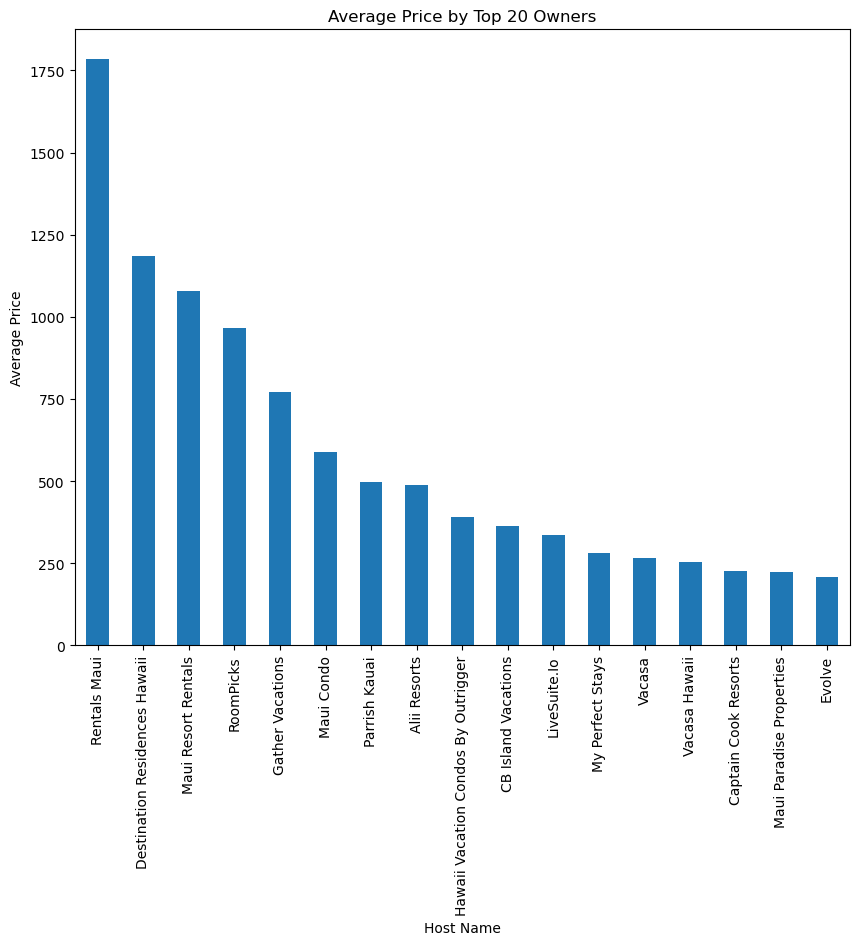

In [138]:
#average price by top 20 owners
avg_price_by_owner = top_20_hosts.groupby('host_name')['price'].mean()
avg_price_by_owner = avg_price_by_owner.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
avg_price_by_owner.plot(kind='bar', x='host_name', y='price')
plt.xlabel('Host Name')
plt.ylabel('Average Price')
plt.title('Average Price by Top 20 Owners')
plt.show()

In [156]:
#find the total numer of rows (rooms) in the top 20 hosts dataframe
rooms_total = top_20_hosts['room_type'].value_counts()

#calculate percentage of each room type 
entire_home_percent = round((rooms_total.get('Entire home/apt', 0)/rooms_total.sum()) * 100, 0)
hotel_room_percent = round((rooms_total.get('Hotel room', 0)/rooms_total.sum()) * 100, 0)
private_room_percent = round((rooms_total.get('Private room', 0)/rooms_total.sum()) * 100, 0)
shared_room_percent = round((rooms_total.get('Shared room', 0)/rooms_total.sum()) * 100, 0)


print(f'The percentage of entire home properties available by the top 20 hosts is {entire_home_percent}')
print(f'The percentage of hotel rooms available by the top 20 hosts is {hotel_room_percent}')
print(f'The percentage of private rooms available by the top 20 hosts is {private_room_percent}')
print(f'The percentage of shared rooms available by the top 20 hosts is {shared_room_percent}')

The percentage of entire home properties available in the top 20 hosts is 97.0
The percentage of hotel rooms available in the top 20 hosts is 0.0
The percentage of private rooms available in the top 20 hosts is 3.0
The percentage of shared rooms available in the top 20 hosts is 0.0


In [146]:
# Create empty dictionaries to store average prices, beds, and property counts
host_avg_prices = {}
host_avg_beds = {}
host_property_counts = {}

# Iterate through the unique host names
for host_name in top_20_hosts['host_name'].unique():
    # Calculate the average price for each host name
    avg_price = round(top_20_hosts[top_20_hosts['host_name'] == host_name]['price'].mean(), 2)
    host_avg_prices[host_name] = avg_price
    
    # Calculate the average number of beds for each host name
    avg_beds = round(top_20_hosts[top_20_hosts['host_name'] == host_name]['beds'].mean(), 0)
    host_avg_beds[host_name] = avg_beds
    
    # Count the total number of properties owned by each host
    property_count = len(top_20_hosts[top_20_hosts['host_name'] == host_name])
    host_property_counts[host_name] = property_count

# Create a DataFrame from the dictionaries
top_20_hosts_df = pd.DataFrame({'host name': list(host_avg_prices.keys()),
                                 'average price': list(host_avg_prices.values()),
                                 'average beds': list(host_avg_beds.values()),
                                 'property count': list(host_property_counts.values())})

top_20_hosts_df = top_20_hosts_df.sort_values(by='average price', ascending=False)
top_20_hosts_df.reset_index(drop=True, inplace=True)
# Print the DataFrame
top_20_hosts_df


,host name,average price,average beds,property count
0,Rentals Maui,1785.49,2.0,222
1,Destination Residences Hawaii,1185.63,3.0,274
2,Maui Resort Rentals,1080.19,4.0,457
3,RoomPicks,966.78,4.0,983
4,Gather Vacations,772.39,4.0,313
5,Maui Condo,587.42,2.0,395
6,Parrish Kauai,499.01,3.0,258
7,Alii Resorts,486.87,0.0,182
8,Hawaii Vacation Condos By Outrigger,390.63,2.0,254
9,CB Island Vacations,362.52,3.0,346


Summary Statistics & Price by Neighborhood


In [101]:
#group by neighbourhood then sort by price
avg_price_neighborhood = hawaii_df.groupby(hawaii_df['neighbourhood_group'])['price'].mean()
avg_price_neighborhood = avg_price_neighborhood.sort_values(ascending=False)

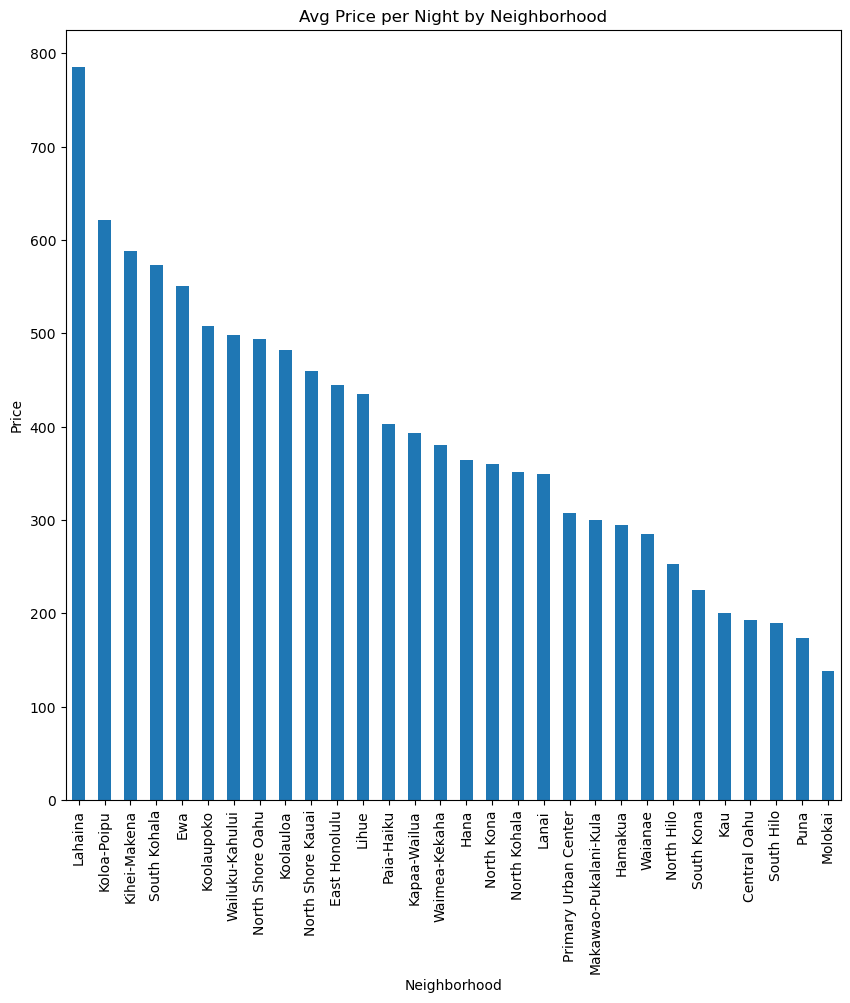

In [102]:
#plot average price per neighborhood group
plt.figure(figsize=(10, 10))

avg_price_neighborhood.plot(kind='bar', x='neighbourhood_group', y='price')

plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Avg Price per Night by Neighborhood')
plt.show()

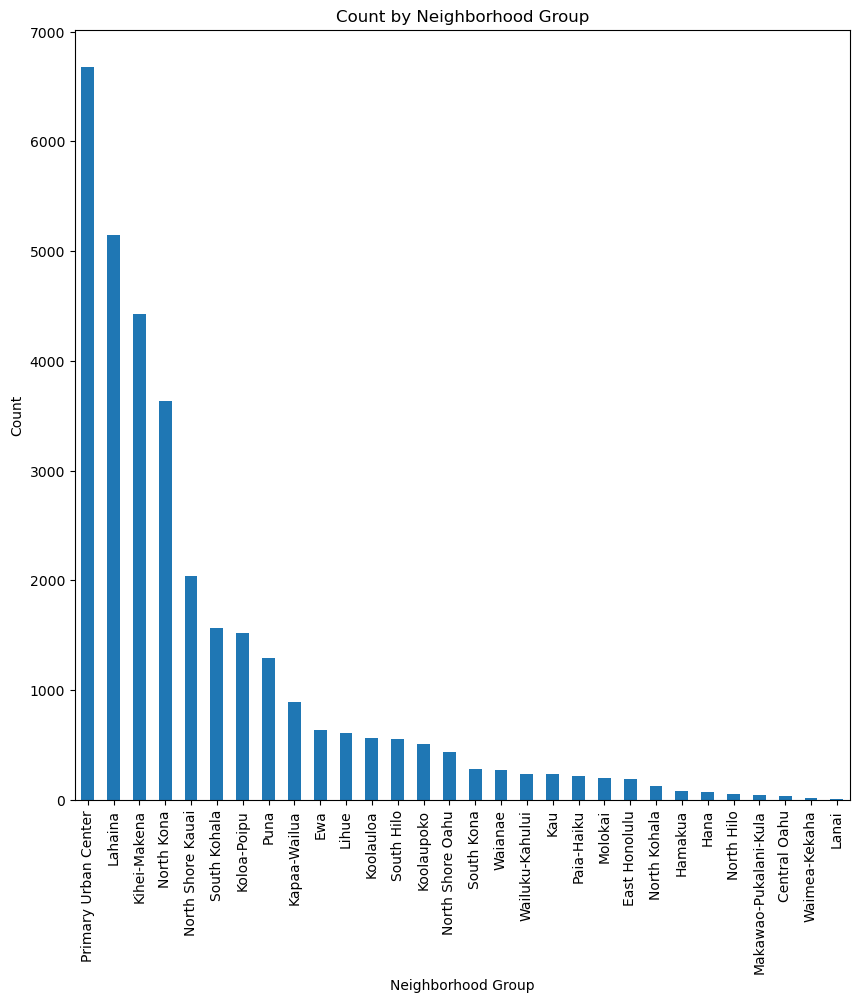

In [152]:
# Calculate counts per neighborhood group
neighborhood_counts = hawaii_df['neighbourhood_group'].value_counts().sort_values(ascending=False)

# Plot counts per neighborhood group
plt.figure(figsize=(10, 10))

neighborhood_counts.plot(kind='bar')

plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.title('Count by Neighborhood Group')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()


In [61]:
#price statistics 
price_summary = hawaii_df['price'].describe()
# Calculate the median
median_price = hawaii_df['price'].median()

# Calculate the mode (may have multiple modes)
mode_price = hawaii_df['price'].mode()


print(price_summary)
print(f'The median price is: {median_price}')
print(f'The mode price is: {mode_price}')


count    32597.000000
mean       475.113507
std       1400.798440
min          0.000000
25%        163.000000
50%        259.000000
75%        440.000000
max      99110.000000
Name: price, dtype: float64
The median price is: 259.0
The mode price is: 0    100
Name: price, dtype: int64


In [160]:
#find percentage of each room type available
rooms_total_hawaii = hawaii_df['room_type'].value_counts()

entire_home_percent_hawaii = round((rooms_total_hawaii.get('Entire home/apt', 0)/rooms_total_hawaii.sum()) * 100, 2)
hotel_room_percent_hawaii = round((rooms_total_hawaii.get('Hotel room', 0)/rooms_total_hawaii.sum()) * 100, 2)
private_room_percent_hawaii = round((rooms_total_hawaii.get('Private room', 0)/rooms_total_hawaii.sum()) * 100, 2)
shared_room_percent_hawaii = round((rooms_total_hawaii.get('Shared room', 0)/rooms_total_hawaii.sum()) * 100, 2)


print(f'The percentage of entire home properties available in Hawaii is {entire_home_percent_hawaii}')
print(f'The percentage of hotel rooms available in Hawaii is {hotel_room_percent_hawaii}')
print(f'The percentage of private rooms available in Hawaii is {private_room_percent_hawaii}')
print(f'The percentage of shared rooms available in Hawaii is {shared_room_percent_hawaii}')

The percentage of entire home properties available in Hawaii is 89.21
The percentage of hotel rooms available in Hawaii is 0.21
The percentage of private rooms available in Hawaii is 10.43
The percentage of shared rooms available in Hawaii is 0.14


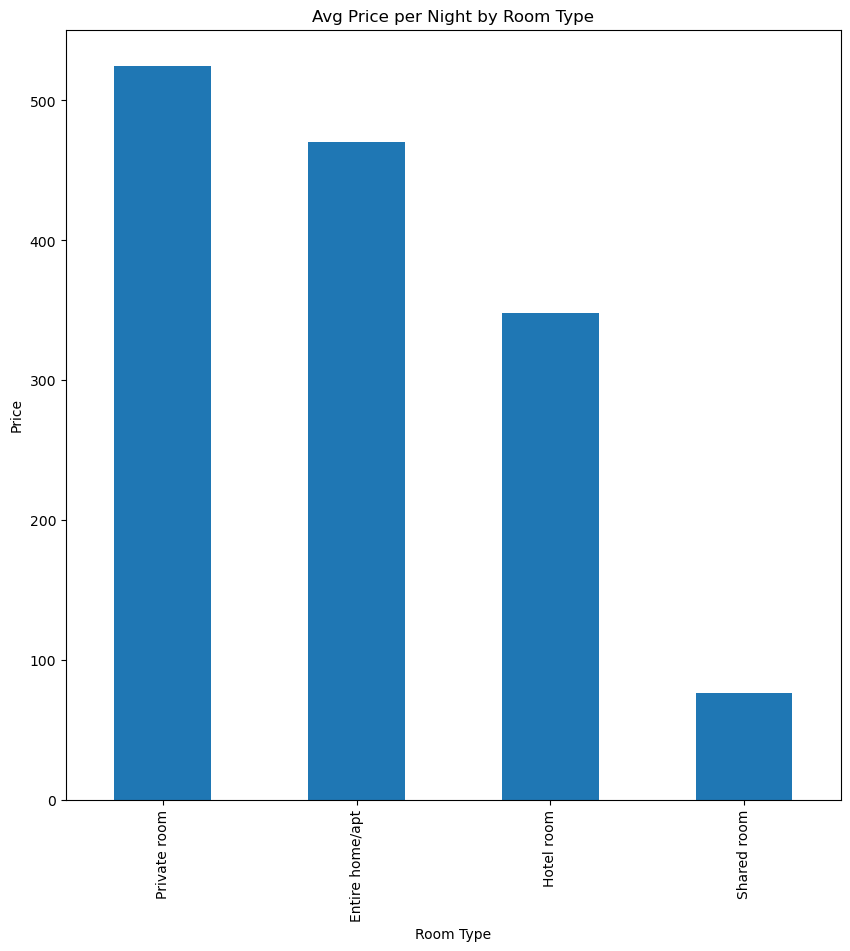

In [161]:
#calulate the average price per room 
avg_price_room_type = hawaii_df.groupby(hawaii_df['room_type'])['price'].mean()
avg_price_room_type = avg_price_room_type.sort_values(ascending=False)

#plot average price per neighborhood group
plt.figure(figsize=(10, 10))

avg_price_room_type.plot(kind='bar', x='room_type', y='price')

plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Avg Price per Night by Room Type')
plt.show()

In [98]:
#findprice values of zero
zero_price = hawaii_df['price'] == 0

zero_price_rows = hawaii_df[zero_price]

# Print the rows where 'price' is zero
print(zero_price_rows)

Empty DataFrame
Columns: [id, host_id, host_name, neighbourhood_group, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, rating, bedrooms, beds, bath]
Index: []


In [ ]:
#remove price values of zero
hawaii_df = hawaii_df[~zero_price]

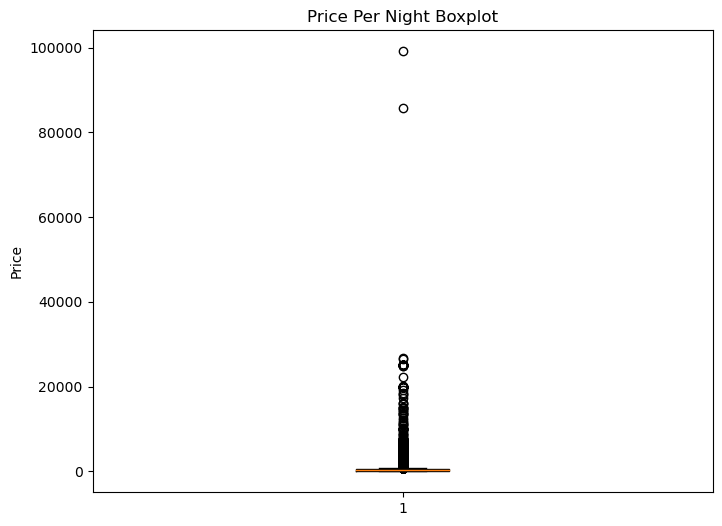

In [103]:
#boxplot of airbnb price 
plt.figure(figsize=(8, 6))

plt.boxplot(hawaii_df['price'])
plt.title('Price Per Night Boxplot')
plt.ylabel('Price')
plt.show()

In [104]:
#find the outliers 
from scipy import stats

z_scores = stats.zscore(hawaii_df['price'])

threshold = 3

outliers = hawaii_df[abs(z_scores) > threshold]

print(outliers)

                       id    host_id                host_name  \
3189             15072077     680107              Hawaii Life   
3391             15818439  101426056  Private Paradise Villas   
3406             15818450  101426056  Private Paradise Villas   
3419             15818459  101426056  Private Paradise Villas   
3530             16029589  101426056  Private Paradise Villas   
...                   ...        ...                      ...   
31987  892074571971404678  243785112                Christine   
32219  903473471957748916  495345281               Pure Kauai   
32220  903473573385458148  495345281               Pure Kauai   
32241  899484342002765345   48697898             South Kohala   
32244  903624599457823546  303747123                  Wailani   

      neighbourhood_group   latitude   longitude        room_type  price  \
3189     North Shore Oahu  21.672270 -158.042920  Entire home/apt  25000   
3391         Kihei-Makena  20.654550 -156.442120  Entire home/apt  

In [96]:
#create a dataframe of outliers 
outliers_df = pd.DataFrame(outliers)

outliers_df

,id,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,bath
3189,15072077,680107,Hawaii Life,North Shore Oahu,21.672270,-158.042920,Entire home/apt,25000,3,5,0.07,162,0,0,4.80,0,8,0
3391,15818439,101426056,Private Paradise Villas,Kihei-Makena,20.654550,-156.442120,Entire home/apt,6314,1,0,NaN,34,0,0,0,4,7,4
3406,15818450,101426056,Private Paradise Villas,Kihei-Makena,20.686322,-156.441525,Entire home/apt,5500,1,5,0.21,34,127,2,5.0,3,4,3.5
3419,15818459,101426056,Private Paradise Villas,Kihei-Makena,20.673725,-156.443253,Entire home/apt,4850,1,2,0.03,34,211,0,0,4,5,5.5
3530,16029589,101426056,Private Paradise Villas,Kihei-Makena,20.743111,-156.456725,Entire home/apt,6500,180,4,0.07,34,0,1,5.0,4,4,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31987,892074571971404678,243785112,Christine,Waianae,21.486392,-158.194876,Entire home/apt,5000,2,0,NaN,14,364,0,New,4,4,2.5
32219,903473471957748916,495345281,Pure Kauai,North Shore Kauai,22.221000,-159.414600,Entire home/apt,5912,7,0,NaN,13,249,0,New,4,8,4.5
32220,903473573385458148,495345281,Pure Kauai,North Shore Kauai,22.217411,-159.435671,Entire home/apt,4837,4,0,NaN,13,244,0,New,6,8,5.5
32241,899484342002765345,48697898,South Kohala,South Kohala,19.927507,-155.879767,Entire home/apt,8621,3,0,NaN,116,277,0,New,3,0,2.5


In [109]:
#list of outlier hosts
outlier_hosts = outliers_df['host_name'].unique()
print(outlier_hosts)

['Hawaii Life' 'Private Paradise Villas' 'Sherry' "Chase 'N Rainbows"
 'Maui Condo' 'Glenn' 'Dahlia' 'Karl' 'Private Homes Hawaii' 'Halekailani'
 'Karin' 'Hale Kamaole' 'Gal' 'Mauna Kea' 'Rex' 'Kauhale' 'Edgar'
 'Rentals Maui' 'Jude' 'Natalia' 'Laine' 'Whalers Investment Group,'
 'Jane' 'Fereshteh' 'Gather Vacations' 'Mauna Lani' 'Lilian' 'Andrew'
 'Maui Westside' 'Mark' 'Bianka' 'K B M Resort Rentals' 'Christopher'
 'Cuvee' 'Haiku House' 'SunHawaii' 'Mia' 'Suiteness' 'Pure Kauai'
 'Iokua Residential Services' 'Maui Resort Rentals' 'Christine'
 'South Kohala' 'Wailani']


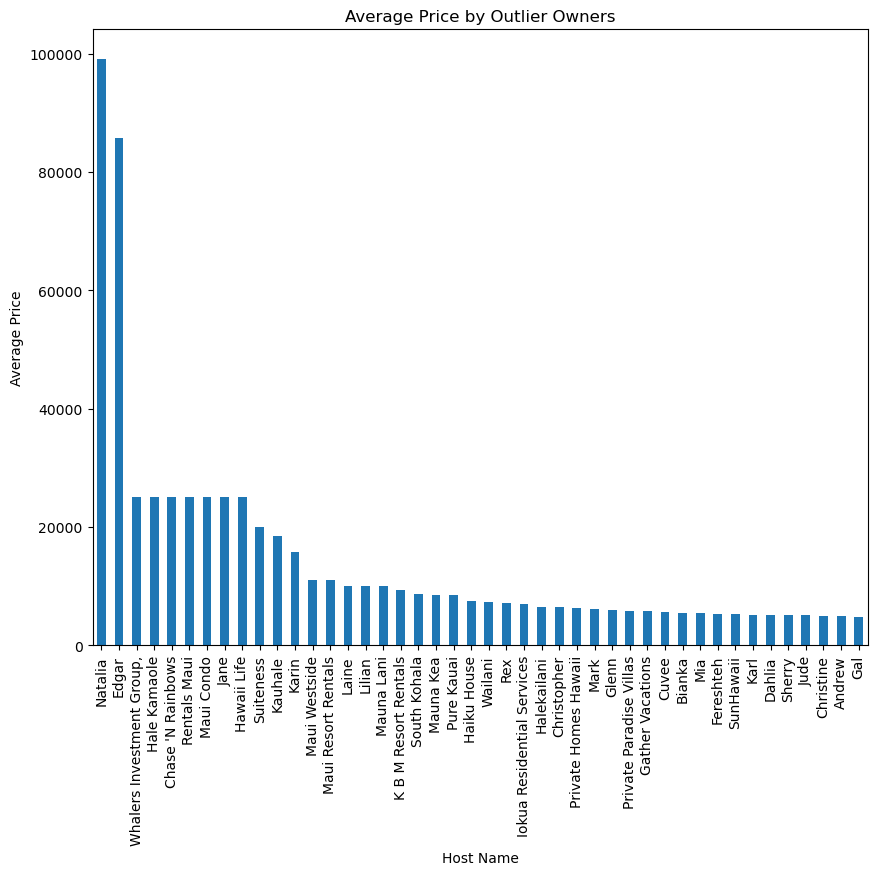

In [108]:
#plot the outliers by host_name
avg_price_by_outlier_owners = outliers_df.groupby('host_name')['price'].mean()
avg_price_by_outlier_owners = avg_price_by_outlier_owners.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
avg_price_by_outlier_owners.plot(kind='bar', x='host_name', y='price')
plt.xlabel('Host Name')
plt.ylabel('Average Price')
plt.title('Average Price by Outlier Owners')
plt.show()

In [162]:
#calculate total number of rooms in the dataframe
rooms_total_outliers = outliers_df['room_type'].value_counts()

#find the percentage of each room type
entire_home_percent_outlier = round((rooms_total_outliers.get('Entire home/apt', 0)/rooms_total_outliers.sum()) * 100, 0)
hotel_room_percent_outlier = round((rooms_total_outliers.get('Hotel room', 0)/rooms_total_outliers.sum()) * 100, 0)
private_room_percent_outlier = round((rooms_total_outliers.get('Private room', 0)/rooms_total_outliers.sum()) * 100, 0)
shared_room_percent_outlier = round((rooms_total_outliers.get('Shared room', 0)/rooms_total_outliers.sum()) * 100, 0)


print(f'The percentage of entire home properties available by hosts in the outlier group is {entire_home_percent_outlier}')
print(f'The percentage of hotel rooms available by hosts in the outlier group is {hotel_room_percent_outlier}')
print(f'The percentage of private rooms available by hosts in the outlier group is {private_room_percent_outlier}')
print(f'The percentage of shared rooms available by hosts in the outlier is {shared_room_percent_outlier}')

The percentage of entire home properties available by hosts in the outlier group is 87.0
The percentage of hotel rooms available by hosts in the outlier group is 0.0
The percentage of private rooms available by hosts in the outlier group is 13.0
The percentage of shared rooms available by hosts in the outlier is 0.0


In [147]:
# Create empty dictionaries to store average prices, beds, and property counts
host_avg_prices = {}
host_avg_beds = {}
host_property_counts = {}

# Iterate through the unique host names
for host_name in outlier_hosts:
    # Calculate the average price for each host name
    avg_price = round(outliers_df[outliers_df['host_name'] == host_name]['price'].mean(), 2)
    host_avg_prices[host_name] = avg_price
    
    # Calculate the average number of beds for each host name
    avg_beds = round(outliers_df[outliers_df['host_name'] == host_name]['beds'].mean(), 0)
    host_avg_beds[host_name] = avg_beds
    
    # Count the total number of properties owned by each host
    property_count = len(outliers_df[outliers_df['host_name'] == host_name])
    host_property_counts[host_name] = property_count

# Create a DataFrame from the dictionaries
host_outliers_df = pd.DataFrame({'host name': list(host_avg_prices.keys()),
                                 'average price': list(host_avg_prices.values()),
                                 'average beds': list(host_avg_beds.values()),
                                 'property count': list(host_property_counts.values())})

host_outliers_df = host_outliers_df.sort_values(by='average price', ascending=False)
host_outliers_df.reset_index(drop=True, inplace=True)
# Print the DataFrame
print(host_outliers_df)


                     host name  average price  average beds  property count
0                      Natalia       99110.00           2.0               1
1                        Edgar       85727.00           2.0               1
2                  Hawaii Life       25000.00           5.0               5
3                 Hale Kamaole       25000.00           3.0               1
4    Whalers Investment Group,       25000.00           4.0               1
5                 Rentals Maui       25000.00           2.0              13
6                         Jane       25000.00           4.0               3
7                   Maui Condo       25000.00           3.0               5
8            Chase 'N Rainbows       25000.00           2.0               1
9                    Suiteness       20000.00           2.0              25
10                     Kauhale       18500.00          16.0               1
11                       Karin       15800.00           6.0               1
12          

In [154]:
# Initialize a flag to check for overlap
overlap_found = False

# Iterate through host names in 'top_20_hosts'
for host_name in top_20_hosts:
    # Check if the host name is also in 'outlier_hosts'
    if host_name in outlier_hosts:
        print(host_name)
        overlap_found = True

# Check if there was no overlap and print the message
if not overlap_found:
    print("No overlapping hosts from top hosts and outlier hosts")

No overlapping hosts from top hosts and outlier hosts


In [165]:
#create csv of hosts who own the most properites
top_20_hosts_df.to_csv('data/top_20_hosts_most_listings_hawaii.csv', index=False)

In [166]:
#create csv of outlier hosts 
host_outliers_df.to_csv('data/hosts_outlier_price_listings_hawaii.csv', index=False)